<a href="https://colab.research.google.com/github/DerekZ66/ALY6110/blob/main/ALY6110_ASS4_Yude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [5]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [6]:
# load data set
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [7]:
# save the data to HIVE table
dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [8]:
# Task 1: Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 5")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [9]:
# Task 1: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


In [10]:
# Task 2: Calculate and display basic statistics (mean, standard deviation, min, max) for the "medv" (median home value) column.
task2_medv = """
SELECT
    AVG(MEDV) AS mean_medv,
    STDDEV(MEDV) AS std_dev_medv,
    MIN(MEDV) AS min_medv,
    MAX(MEDV) AS max_medv
FROM bostonh.bos_housing;
"""
# Task 2: Calculate and display the mean "rm" (average number of rooms per dwelling).
task2_rm = """
SELECT AVG(RM) AS mean_rm
FROM bostonh.bos_housing;
"""

# Execute task2 with spark.sql
spark.sql(task2_medv).show()
spark.sql(task2_rm).show()


+------------------+-----------------+--------+--------+
|         mean_medv|     std_dev_medv|min_medv|max_medv|
+------------------+-----------------+--------+--------+
|22.532806324110698|9.197104087379815|     5.0|    50.0|
+------------------+-----------------+--------+--------+

+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



In [11]:
# Task 3: Identify the property with the highest crime rate ("crim"). Provide details about this property.
task3_crim = """
SELECT *
FROM bostonh.bos_housing
ORDER BY CRIM DESC
LIMIT 1;
"""
# Task 3: Find and report the property with the lowest median home value ("medv"). Include its details
task3_medv = """
SELECT *
FROM bostonh.bos_housing
ORDER BY MEDV ASC
LIMIT 1;
"""
# Execute task3 with spark.sql
spark.sql(task3_crim).show()
spark.sql(task3_medv).show()



+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



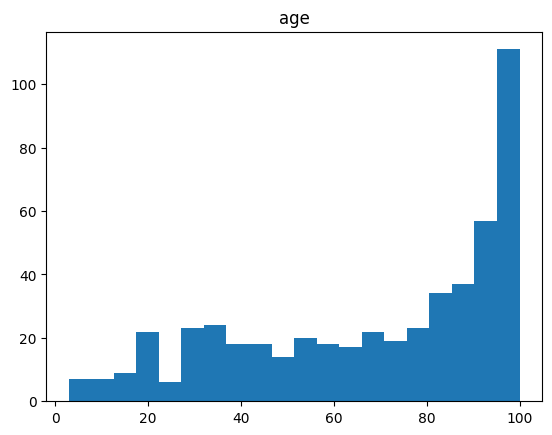

In [12]:
# Task 4: Create a histogram showing the distribution of the "age" column.
import pandas as pd

df_pd = pd.read_csv('BostonHousing.csv')
df_pd.hist('age', grid=False, bins=20);

In [13]:
# Task 4: Calculate and report the percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River
task4_chas = """
SELECT
    COUNT(*) AS total_records,
    COUNT(CASE WHEN CHAS = 1 THEN 1 END) AS chas_1_count,
    ROUND((COUNT(CASE WHEN CHAS = 1 THEN 1 END) / COUNT(*)) * 100, 2) AS chas_1_percentage
FROM bostonh.bos_housing;
"""
spark.sql(task4_chas).show()


+-------------+------------+-----------------+
|total_records|chas_1_count|chas_1_percentage|
+-------------+------------+-----------------+
|          506|          35|             6.92|
+-------------+------------+-----------------+



In [14]:
# Task 5: Calculate the correlation coefficient between "rm" and "medv." Explain the relationship between the average number of rooms and median home value.
task5_corr = """
SELECT
    CORR(RM, MEDV) AS correlation_rm_medv
FROM bostonh.bos_housing;
"""

# Task 5: Investigate if there is any correlation between "ptratio" (pupil-teacher ratio) and "nox" (nitrogen oxide concentration). Report your findings.
task5_nox = """
SELECT
    CORR(PTRATIO, NOX) AS correlation_ptratio_nox
FROM bostonh.bos_housing;
"""

# Execute task5 with spark.sql
spark.sql(task5_corr).show()
spark.sql(task5_nox).show()

+-------------------+
|correlation_rm_medv|
+-------------------+
| 0.6953599470715401|
+-------------------+

+-----------------------+
|correlation_ptratio_nox|
+-----------------------+
|    0.18893267711276893|
+-----------------------+



In [15]:
# Task 6: Write a HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv").
task6_medv = """
SELECT *
FROM bostonh.bos_housing
ORDER BY MEDV DESC
LIMIT 5;
"""

# Task 6: Calculate and report the average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0.
task6_chas = """
SELECT
    CHAS,
    AVG(AGE) AS avg_property_age
FROM bostonh.bos_housing
GROUP BY CHAS;
"""

# Execute task6 with spark.sql
spark.sql(task6_medv).show()
spark.sql(task6_chas).show()


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+

+----+-----------------+
|CHAS| avg_property_age|
+----+-----------------+
|   1|77.50000000000001|
|   0|67.91167728237794|
+----+-----------------+



In [16]:
# Task 7: Create a Hive view named "property_age_view" that includes the "age" and "medv" columns.
task7_view = """
CREATE OR REPLACE VIEW property_age_view AS
SELECT AGE, MEDV
FROM bostonh.bos_housing;
"""

# Execute task7 with spark.sql
spark.sql(task7_view).show()


++
||
++
++



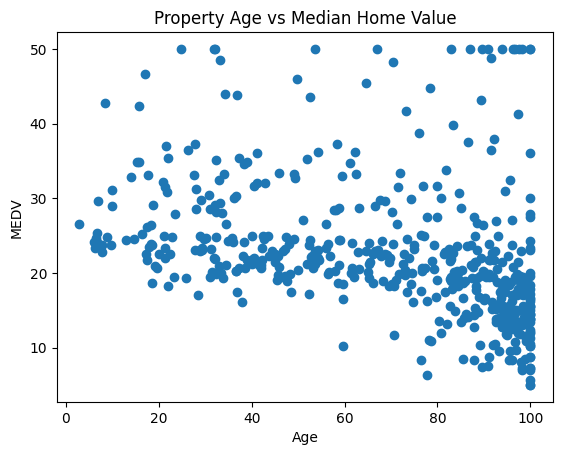

In [58]:
# Task 7: Plot a scatter plot of property age against median home value using a data visualization tool of your choice.
import matplotlib.pyplot as plt
# Plotting the scatter plot
plt.scatter(df_pd['age'], df_pd['medv'])
plt.xlabel('Age')
plt.ylabel('MEDV')
plt.title('Property Age vs Median Home Value')
plt.show()

In [56]:
# Task 8: Write a query to identify and report properties with a "crim" value greater than 10 (considered as potential outliers).
task8_crim = """
SELECT *
FROM bostonh.bos_housing
WHERE CRIM > 10
ORDER BY CRIM DESC;
"""

# Execute task7 with spark.sql
spark.sql(task8_crim).show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|73.5341|0.0| 18.1|   0|0.679|5.957|100.0|1.8026| 24|666|   20.2| 16.45|20.62| 8.8|
|67.9208|0.0| 18.1|   0|0.693|5.683|100.0|1.4254| 24|666|   20.2|384.97|22.98| 5.0|
|51.1358|0.0| 18.1|   0|0.597|5.757|100.0| 1.413| 24|666|   20.2|   2.6|10.11|15.0|
|45.7461|0.0| 18.1|   0|0.693|4.519|100.0|1.6582| 24|666|   20.2| 88.27|36.98| 7.0|
|41.5292|0.0| 18.1|   0|0.693|5.531| 85.4|1.6074| 24|666|   20.2|329.46|27.38| 8.5|
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2| 396.9|30.59| 5.0|
|37.6619|0.0| 18.1|   0|0.679|6.202| 78.7|1.8629| 24|666|   20.2| 18.82|14.52|10.9|
|28.6558|0.0| 18.1|   0|0.597|5.155|100.0|1.5894| 24|666|   20.2|210.97|20.0

In [52]:
# Task 9: Formulate a hypothesis about the impact of the "rm" (average number of rooms) on median home value.
task9_regre = """
SELECT
    SUM((RM - AVG_RM) * (MEDV - AVG_MEDV)) / SUM((RM - AVG_RM) * (RM - AVG_RM)) AS beta_rm,
    STDDEV_POP(MEDV) / SQRT(SUM((MEDV - AVG_MEDV) * (MEDV - AVG_MEDV)) / (COUNT(*) - 1)) AS t_statistic,
    COUNT(*) AS sample_size
FROM
    (SELECT
        RM,
        MEDV,
        AVG(RM) OVER () AS AVG_RM,
        AVG(MEDV) OVER () AS AVG_MEDV
    FROM bostonh.bos_housing) sub;
"""

spark.sql(task9_regre).show()



+-----------------+-----------------+-----------+
|          beta_rm|      t_statistic|sample_size|
+-----------------+-----------------+-----------+
|9.102108981180303|0.999011369011894|        506|
+-----------------+-----------------+-----------+



In [59]:
spark.stop()